In [5]:
import sys

# Change path to wherever you have repo locally
sys.path.append('/oak/stanford/groups/engreitz/Users/ymo/Tools/cNMF_benchmarking/cNMF_benchmarking_pipeline')

from Plotting.src import * 

In [2]:
import cnmf

# combine all NMF runs for k = 100
cnmf_obj = cnmf.cNMF(output_dir="/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Results/cNMF_100_07102024", name="consensus_NMF")
combined = hundred = cnmf_obj.combine_nmf(100)

Combining factorizations for k=100.


In [3]:
# calculate cor, distance, overlaps
top_gene = 300

cor = program_corr(combined,combined)
distance = program_euclidean(combined,combined)
overlap = top_genes_overlap(combined,combined,top_gene)

In [26]:
# graph heatmap base on the clustermap 
def graph_heatmap(g, r, c, folder_name = None , file_name = None, num_gene = 300, sorted = False):
    # g = clustermap
    # r,c dimension of calculating averages

    mat = g.data2d.to_numpy()  

    assert mat.shape[0] % r == 0 and mat.shape[1] % c == 0, \
           "Rows/cols must divide evenly by block size."

    n_row_blocks = mat.shape[0] // r
    n_col_blocks = mat.shape[1] // c

    """blocks = (mat.reshape(n_row_blocks, r, n_col_blocks, c)
            .swapaxes(1, 2)              
            .reshape(-1, r, c))"""

    blocks = (mat.reshape(r, r, r, r)
            .swapaxes(1, 2)              
            .reshape(-1, r, c))

    block_means = (blocks.mean(axis=(1, 2))).astype(int)
    plt.figure(figsize=(12, 8))
    sns.heatmap(block_means.reshape(10,10),annot=True, cmap='inferno_r',fmt='d')        
    plt.title("Heatmap for matching programs")

    if folder_name and file_name:
        g.savefig(f"{folder_name}/{file_name}.png")
 
    plt.show()

    # Sorted heatmap
    if sorted: 
        matrix = block_means.reshape(10,10).tolist()

        for i in range(len(matrix)):
            max_index = matrix[i].index(max(matrix[i]))
            # Swap max element with the diagonal element
            matrix[i][i], matrix[i][max_index] = matrix[i][max_index], matrix[i][i]

        plt.figure(figsize=(12, 8))
        sns.heatmap(np.array(matrix).reshape(r,c),annot=True, cmap='inferno_r',fmt='d')        
        plt.title("Sorted Heatmap for matching programs " + file_name)

        if folder_name and file_name:
            g.savefig(f"{folder_name}/{file_name}_sorted.png")
 
        plt.show()


In [ ]:
cor = program_corr(combined,combined)
g1 = graph_cluster(cor, save_file_name="ClusterMap for correlation on K=100")
graph_heatmap(g1, 10, 10, num_gene = 300, sorted = True)


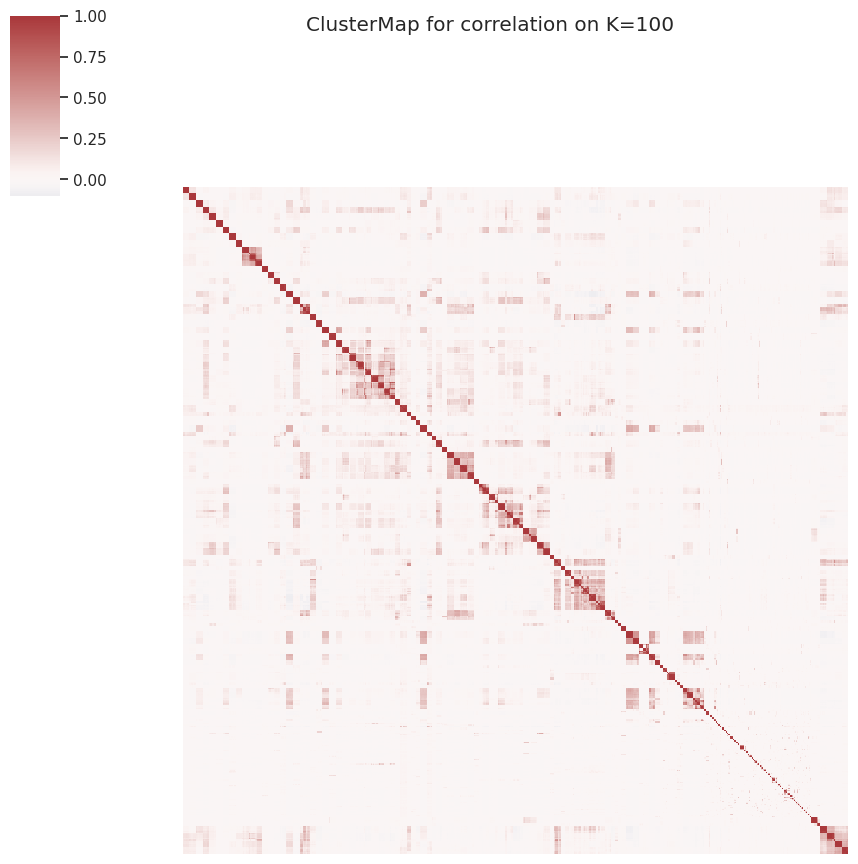

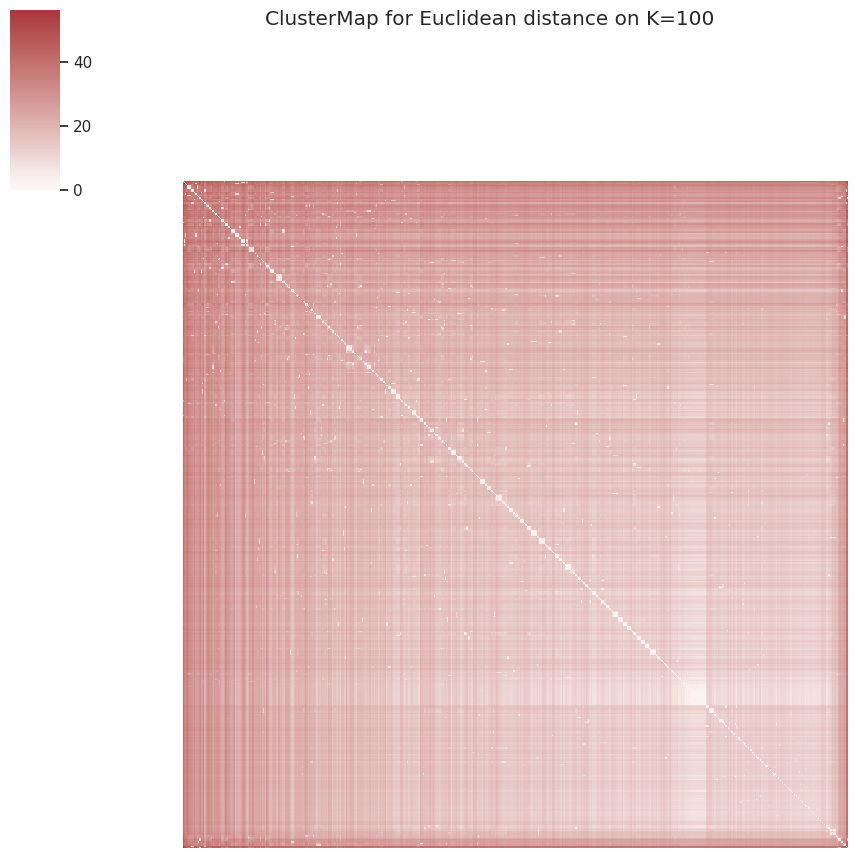

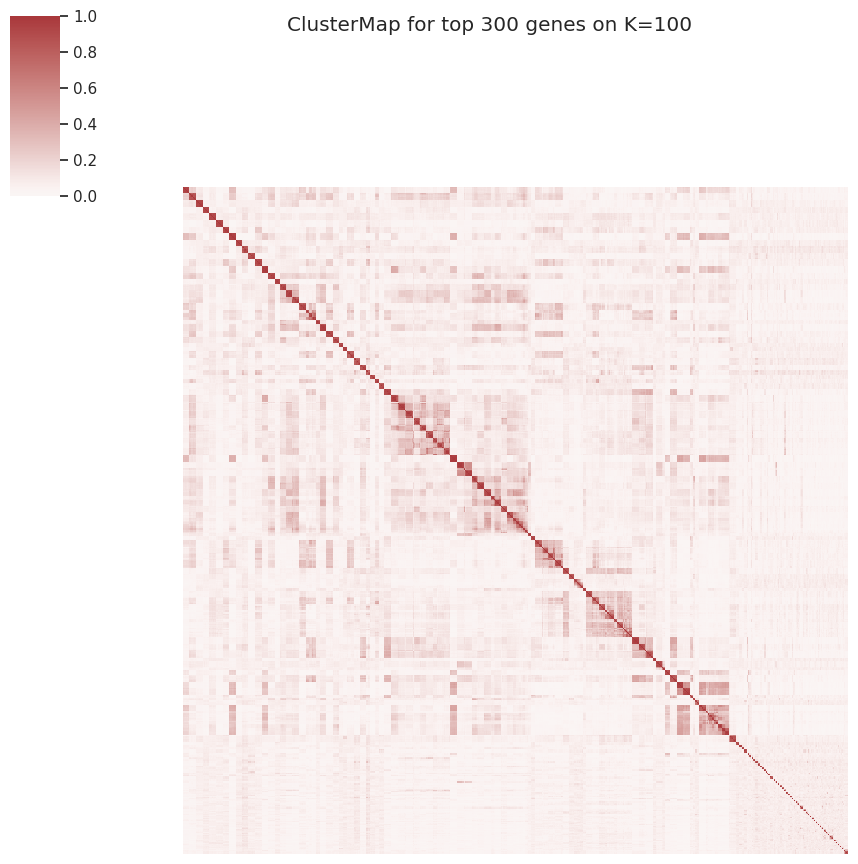

In [7]:
g1 = graph_cluster(cor, save_file_name="ClusterMap for correlation on K=100")
g2 = graph_cluster(distance, save_file_name="ClusterMap for Euclidean distance on K=100")
g3 = graph_cluster(overlap, save_file_name="ClusterMap for top 300 genes on K=100")

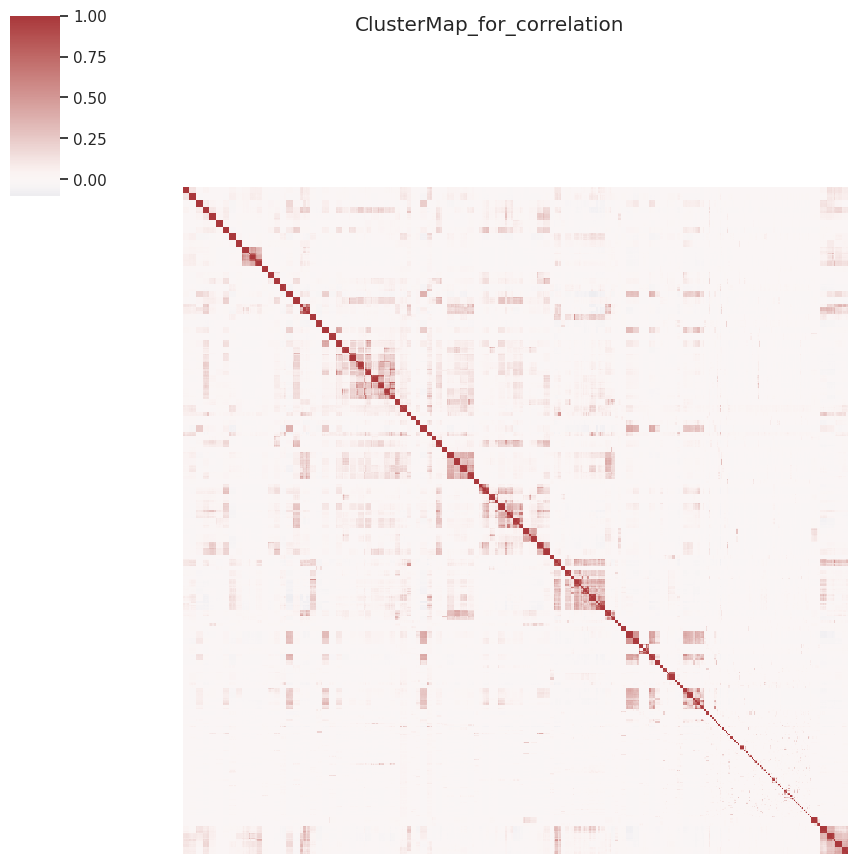

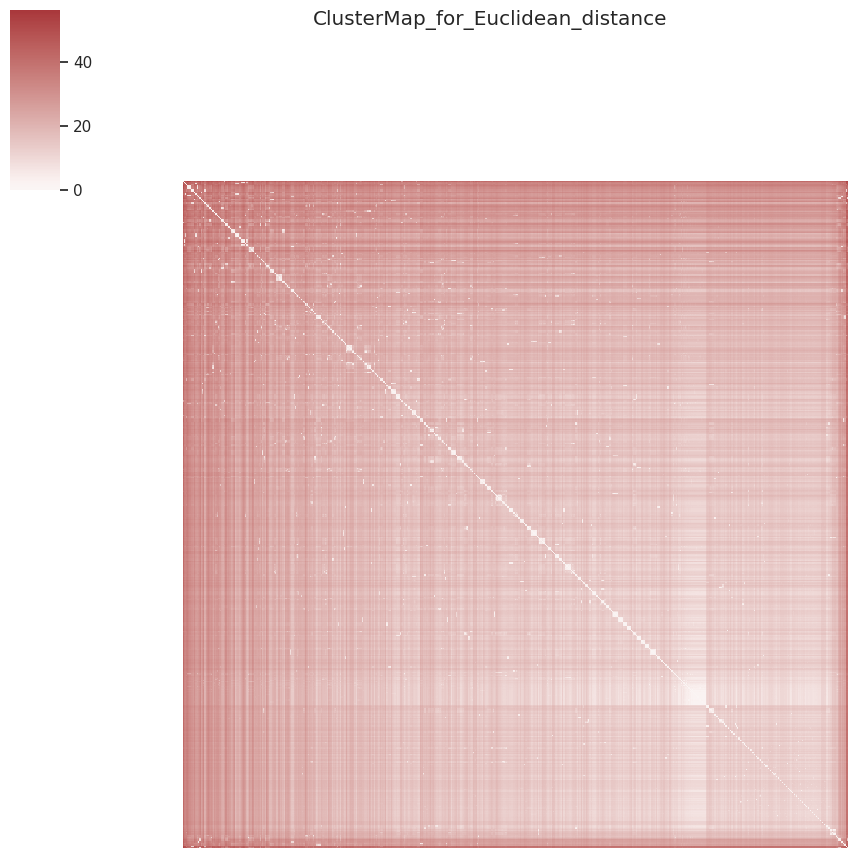

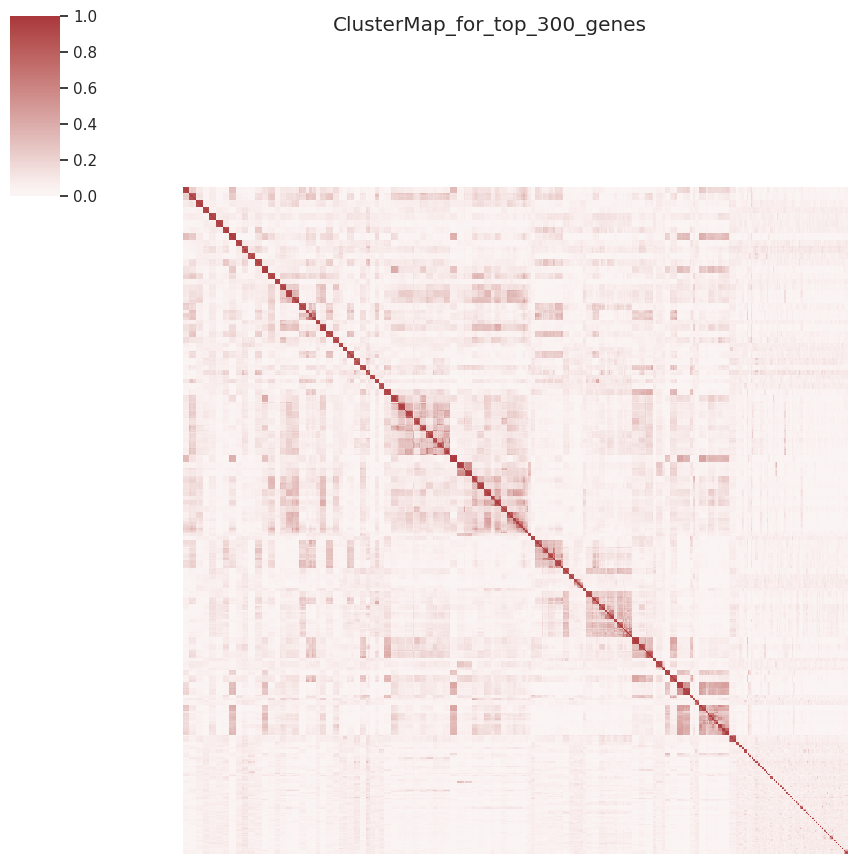

In [12]:
graph_pdf_clustermap(cor,distance,overlap,"/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Results/cNMF_100_07102024/consensus_NMF/Eval", "Program 0.pdf")